<a href="https://colab.research.google.com/github/yohanesnuwara/geostatistics/blob/main/project_notebooks/north_sea_stress_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install -q utm
import utm

plt.style.use('classic')

In [2]:
# Get FORCE
!wget "https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip"

--2021-03-07 10:38:33--  https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bolgebrygg/Force-2020-Machine-Learning-competition/master/lithology_competition/data/train.zip [following]
--2021-03-07 10:38:33--  https://raw.githubusercontent.com/bolgebrygg/Force-2020-Machine-Learning-competition/master/lithology_competition/data/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91653972 (87M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>

In [3]:
# Get World Stress Map 2016 data
!wget "ftp://datapub.gfz-potsdam.de/download/10.5880.WSM.2016.001/wsm2016.csv"

--2021-03-07 10:38:35--  ftp://datapub.gfz-potsdam.de/download/10.5880.WSM.2016.001/wsm2016.csv
           => ‘wsm2016.csv’
Resolving datapub.gfz-potsdam.de (datapub.gfz-potsdam.de)... 139.17.228.237
Connecting to datapub.gfz-potsdam.de (datapub.gfz-potsdam.de)|139.17.228.237|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /download/10.5880.WSM.2016.001 ... done.
==> SIZE wsm2016.csv ... 9526616
==> PASV ... done.    ==> RETR wsm2016.csv ... done.
Length: 9526616 (9.1M) (unauthoritative)

wsm2016.csv         100%[===================>]   9.08M  2.80MB/s    in 4.8s    

2021-03-07 10:38:43 (1.88 MB/s) - ‘wsm2016.csv’ saved [9526616]



In [4]:
!unzip "/content/train.zip"

Archive:  /content/train.zip
  inflating: train.csv               


In [5]:
# Read FORCE data
df = pd.read_csv("/content/train.csv", sep=";")

df.head(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
5,15/9-13,495.288,437641.96875,6470972.5,-470.261780,NORDLAND GP.,NaN,19.453100,NaN,1.585567,1.804719,1.879687,72.014420,NaN,NaN,43.657482,160.149292,23.931278,NaN,75.281410,NaN,NaN,-0.601600,NaN,NaN,NaN,NaN,65000,1.0
6,15/9-13,495.440,437641.96875,6470972.5,-470.413788,NORDLAND GP.,NaN,19.462496,NaN,1.576569,1.805498,1.878731,72.588089,NaN,NaN,42.236221,161.250381,23.381790,NaN,76.199951,NaN,NaN,-0.598369,NaN,NaN,NaN,NaN,65000,1.0
7,15/9-13,495.592,437641.96875,6470972.5,-470.565796,NORDLAND GP.,NaN,19.468800,NaN,1.587011,1.808367,1.867837,71.283051,NaN,NaN,39.933563,162.214416,23.632166,NaN,76.199951,NaN,NaN,-0.602039,NaN,NaN,NaN,NaN,65000,1.0
8,15/9-13,495.744,437641.96875,6470972.5,-470.717773,NORDLAND GP.,NaN,19.468800,NaN,1.613674,1.815813,1.847233,69.721436,NaN,NaN,39.163223,161.575104,22.163542,NaN,75.898796,NaN,NaN,-0.614364,NaN,NaN,NaN,NaN,65000,1.0
9,15/9-13,495.896,437641.96875,6470972.5,-470.869782,NORDLAND GP.,NaN,19.468800,NaN,1.634622,1.813916,1.836309,66.677727,NaN,NaN,37.802933,160.583359,23.659925,NaN,68.121262,NaN,NaN,-0.621813,NaN,NaN,NaN,NaN,65000,1.0


In [19]:
# Latlon minmax of the studied FORCE North Sea
xmin, xmax = df.X_LOC.min(), df.X_LOC.max()
ymin, ymax = df.Y_LOC.min(), df.Y_LOC.max()

utmx = np.array([xmin,xmax])
utmy = np.array([ymin,ymax])

# latlon = utm.to_latlon(utmx, utmy, 31, 'N')

# print(latlon) # Returns latmin,lonmin,latmax,lonmax

# latmin, lonmin = latlon[1]
# latmax, lonmax = latlon[0]

print(utmx, utmy)

[426898.78125 572632.75   ] [6406641. 6856661.]


In [7]:
wsm = pd.read_csv("/content/wsm2016.csv", usecols=[2,3,4])

wsm

,LAT,LON,AZI
0,40.300,28.230,100
1,40.070,27.390,105
2,39.000,27.000,87
3,39.100,41.600,38
4,37.800,29.300,101
...,...,...,...
42865,34.680,-95.190,72
42866,35.160,-98.900,70
42867,8.592,84.077,157
42868,8.681,84.034,82


In [8]:
wsm.describe()

,LAT,LON,AZI
count,42870.000000,42870.000000,42870.000000
mean,16.742591,27.004138,134.835106
std,32.650017,101.664727,204.395412
min,-77.070000,-179.980000,0.000000
25%,-8.372500,-64.867500,46.000000
50%,30.122500,25.960000,94.000000
75%,40.748500,119.900000,141.000000
max,86.390000,180.000000,999.000000


In [9]:
# Data has LAT more than 84 degrees, while this is not correct. So, remove them.
wsm = wsm[wsm.LAT<84]

wsm

,LAT,LON,AZI
0,40.300,28.230,100
1,40.070,27.390,105
2,39.000,27.000,87
3,39.100,41.600,38
4,37.800,29.300,101
...,...,...,...
42865,34.680,-95.190,72
42866,35.160,-98.900,70
42867,8.592,84.077,157
42868,8.681,84.034,82


In [15]:
wsm_utm = [ utm.from_latlon(wsm.LAT.values[i], wsm.LON.values[i]) for i in range(len(wsm.LAT.values)) ]

wsm['UTMX'] = [a_tuple[0] for a_tuple in wsm_utm]
wsm['UTMY'] = [a_tuple[1] for a_tuple in wsm_utm]
wsm['Zone_number'] = [a_tuple[2] for a_tuple in wsm_utm]
wsm['Zone_letter'] = [a_tuple[3] for a_tuple in wsm_utm]

wsm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,LAT,LON,AZI,UTMX,UTMY,Zone_number,Zone_letter
0,40.300,28.230,100,604532.847327,4.461781e+06,35,T
1,40.070,27.390,105,533256.309182,4.435599e+06,35,T
2,39.000,27.000,87,500000.000000,4.316777e+06,35,S
3,39.100,41.600,38,724837.255766,4.331092e+06,37,S
4,37.800,29.300,101,702494.695386,4.186117e+06,35,S
...,...,...,...,...,...,...,...
42865,34.680,-95.190,72,299366.640427,3.839740e+06,15,S
42866,35.160,-98.900,70,509107.368827,3.890791e+06,14,S
42867,8.592,84.077,157,178235.262403,9.509723e+05,45,P
42868,8.681,84.034,82,173574.423965,9.608608e+05,45,P


In [25]:
wsm_northsea = wsm[((wsm.UTMX>=xmin) & (wsm.UTMY>=ymin)) & ((wsm.UTMX<=xmax) & (wsm.UTMY<=ymax))]
wsm_northsea = wsm_northsea[wsm_northsea.Zone_number==31].reset_index() # North sea has UTM zone 31

wsm_northsea

,index,LAT,LON,AZI,UTMX,UTMY,Zone_number,Zone_letter
0,311,59.600,2.200,160,454841.013171,6.607137e+06,31,V
1,313,59.800,2.200,110,455109.519072,6.629409e+06,31,V
2,315,60.000,2.500,102,472111.336056,6.651517e+06,31,V
3,316,61.000,2.000,145,445915.618988,6.763200e+06,31,V
4,317,61.174,2.207,109,457345.469658,6.782427e+06,31,V
...,...,...,...,...,...,...,...,...
76,19409,61.319,2.559,97,476387.840183,6.798400e+06,31,V
77,19410,61.442,2.476,101,472053.884232,6.812133e+06,31,V
78,19411,61.363,2.460,107,471127.761683,6.803340e+06,31,V
79,19412,61.355,2.455,97,470852.991198,6.802452e+06,31,V


Quiver azimuths

In [26]:
azi = wsm_northsea.AZI.values
qui_x = []
qui_y = []

for i in range(len(azi)):
  if azi[i] <= 90:
    azi_x = np.sin(np.deg2rad(azi[i]))
    azi_y = np.cos(np.deg2rad(azi[i]))
  if azi[i] > 90:
    azi_x = np.sin(np.deg2rad(180 - azi[i]))
    azi_y = -np.cos(np.deg2rad(180 - azi[i]))
  qui_x.append(float(azi_x))
  qui_y.append(float(azi_y))

print(qui_x)
print(qui_y)

[0.3420201433256687, 0.9396926207859083, 0.9781476007338056, 0.573576436351046, 0.9455185755993167, 1.0, 0.981627183447664, 0.9876883405951378, 0.573576436351046, 1.0, 0.5591929034707469, 0.0, 0.29237170472273677, 0.9205048534524404, 0.9993908270190958, 0.9902680687415704, 0.9455185755993167, 0.981627183447664, 0.9781476007338056, 0.984807753012208, 0.9986295347545738, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377, -0.9876883405951377

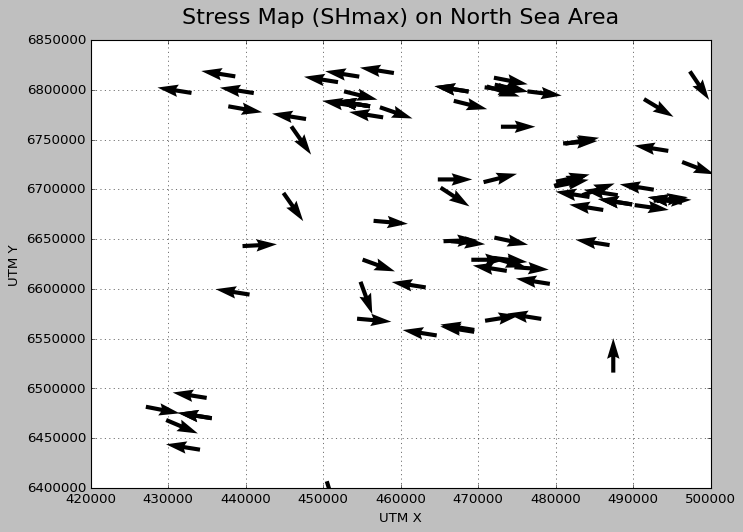

In [34]:
x = wsm_northsea.UTMX.values
y = wsm_northsea.UTMY.values
u = qui_x
v = qui_y

plt.figure(figsize=(10,7))
plt.quiver(x, y, u, v)
plt.title("Stress Map (SHmax) on North Sea Area", size=20, pad=15)
plt.xlabel("UTM X"); plt.ylabel("UTM Y")

plt.grid()
plt.show()